a set S is said to be a subset of set T if every element of S is also an element of set T

key properties:
    - reflexivity: every set is a subset of itself
    - antisymmetry: if S is a subset of T and if T is a subset of S then S = T
    - transitivity: if S is a subset of T and T is a subset of U then S is a subset of U
    - powerset: set of all subsets of a given set


at the core set inclusion preserves structure: relationship between elements of sets is mainatined and no element escapes the defining boundaries
the notion of keeping an invariant (all elements of S remain in T, where S is a subset of T)

just as set inclusion involves selecting a specific subset of elements from a larger set while preserving the structure (where every element of the subset still retains its inherent relationships with others), in TDA (topological data analysis) and GeoML (geometric machine leanring), features or data points are selected based on certain specific criteria ensuring that essential structural or geometric properties remain intact

in GeoML where data is often represented in a space where each point has a defined distance to others, GeoML methods ensures that the distances (derived properties of geometry) are maintained even afer data transformation or dimensionality reduction

in set inclusion relationships remain intact between the elemnents that are included, same concept is followed in GeoML where methods ensure that local neighborhoods and global structures remain consistent

in the process of filtering data, generally starting from a noisy data and progressibely to a more refined data that reveals the structure, it can help reveal features that aren't immediately obvious

in image analysis it could help identify the main connected regions or shapes in an image which remain or stay consistent despie lightning or orientation

in GeoML it helps in preserving spatial relationships such as edges when transforming images for tasks such as object recognition


ex: in a city where roads, intersections, and blocks represent respective data points and their relationships, they remain consistent even if they are scaled down  
    or transformed (rotated)


In [117]:
# checks for subset
def is_subset(S, T):
    """
    determines or validates if S is a subset of T
    parameters:
        - S: subset, T: superset
    returns a bool True if is subset else False
    """
    return all(elem in T for elem in S)

# set already has an optimized method to check subset S.issubset(T) or S < T

In [118]:
# method to generate powerset
def power_set(S):
    """
    generate the powerset of a given set S
    parameters: S the input set
    returns a frozenset each representing a subset of S    
    """

    """
    combinations(S, r) for r in range(len(S) + 1): generates all subsets of S that contain exactly r elements
    generating subsets using combinations(S, r) gives multiple seperate iterables one for each subset size and generates multiple iterables
    .from_iterable flattens which takes a nested structure and converts it into a single continuous objects
    """
    from itertools import chain, combinations
    return set(frozenset(comb) for comb in chain.from_iterable(combinations(S, r) for r in range(len(S) + 1)))

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll

In [120]:
# generate Swiss Roll dataset
n_samples = 1500 # number of rows or data points
noise = 0.05 # random variation
data,_ = make_swiss_roll(n_samples=n_samples, noise=noise, random_state=32) # random_state ensures that the same data set is generated everytime

In [121]:

"""
filtering data : extract a subset of data points based on condition/s
in this context the  goal is to keep only the data points where the first coordinate (column 0) is in the specified conditional range
filtering checks only the first coordinate or column 0 of the data
boolean is used to identify the rows that satisfy the condition and then the desired subset of data is extracted

"""

def filter_by_range(data, lower_bound, upper_bound):
    """
    parameters:
        - data: dataset (shape: rows x 3)
        - lower_bound, upper_bound: lower and upper bounds for filtering data based on the first dimension,
    returns a filtered array of data points
    """
    # boolean mask to check or condition which holds true for the first column of data
    # data[:,0] extracts the first column 
    # >= lower_bound and <= upper_bound creates a boolean array where true indicates that the value meets the lower bound conidtion and the same for upper bound
    mask = (data[:, 0] >= lower_bound) & (data[:,0] <= upper_bound)
    return data[mask] # retains only the rows for which the mask value is Trues

In [122]:
# filering the data of swiss roll using the filter_by_range applied on the first column
filtered_data = filter_by_range(data, lower_bound=5, upper_bound=10)

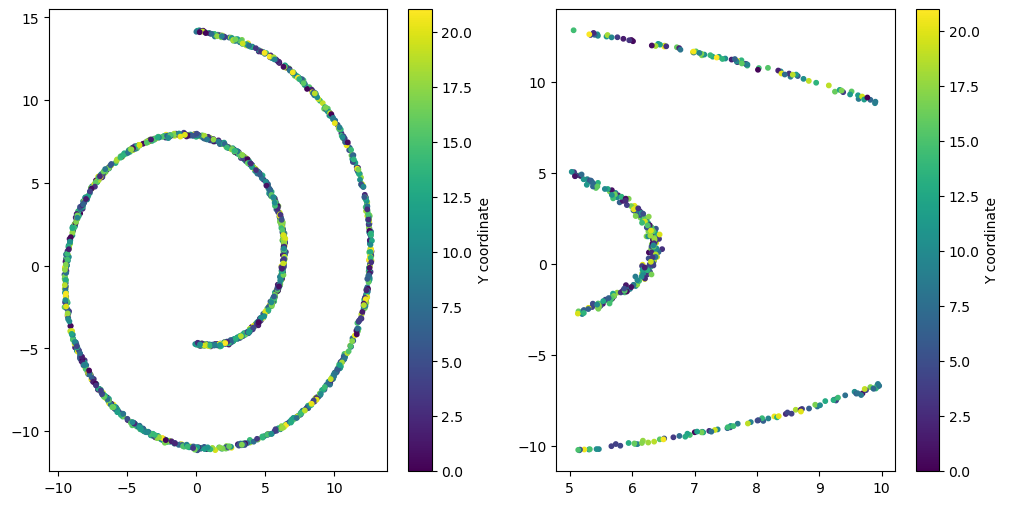

In [123]:
# visualize and compare original and filtered data
fig, ax = plt.subplots(1, 2, figsize=(12, 6)) # creates a figure and two subplots arrange in one row and 2 columns

#left plot: original swiss roll data
# scatter plot on the first subpplot data[:, 0] x-axis (1st column), data[:,2] y-axis values (3rd column), 
# c=data[:,1] colors each point based on the data's y-coordinate
scatter1 = ax[0].scatter(data[:,0], data[:,2], c=data[:,1], cmap='viridis',s=10)
scatter2 = ax[1].scatter(filtered_data[:,0], filtered_data[:,2], c=filtered_data[:,1], cmap='viridis',s=10)

# color bar 
fig.colorbar(scatter1, ax=ax[0], label='Y coordinate')
fig.colorbar(scatter2,ax=ax[1], label='Y coordinate')

plt.show()

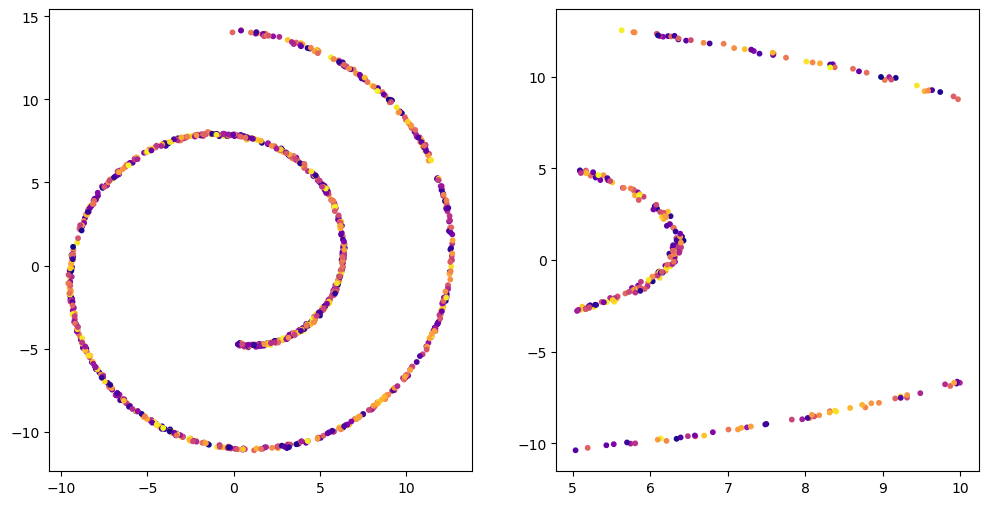

In [124]:
import pandas as pd

# generate, process, and filter the swiss roll data
def load_and_process_swiss_roll(n_samples=1000, noise=0.05, random=42):
    """
    parameters: 
        - n_sample: number of data points to generate
        - noise: adds slight randomness to the data
        - random_state: ensures that the daa remains same everytime
    """
    data,_ = make_swiss_roll(n_samples=n_samples, noise=noise, random_state=random)

    # convert the numpy data array to a dataframe
    df = pd.DataFrame(data, columns=['X', 'Y', 'Z'])
    
    # apply filter analogous to set inclusions 
    df_filtered = df[(df['X'] >= 5) & (df['X'] <= 10)]
    return df, df_filtered
    
# data visualization using the original and filtered data
df_original, df_filtered = load_and_process_swiss_roll()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

scatter1 = ax[0].scatter(df_original['X'], df_original['Z'], c=df_original['Y'], cmap='plasma', s=10)

scatter2 = ax[1].scatter(df_filtered['X'], df_filtered['Z'], c=df_filtered['Y'], cmap='plasma', s=10)

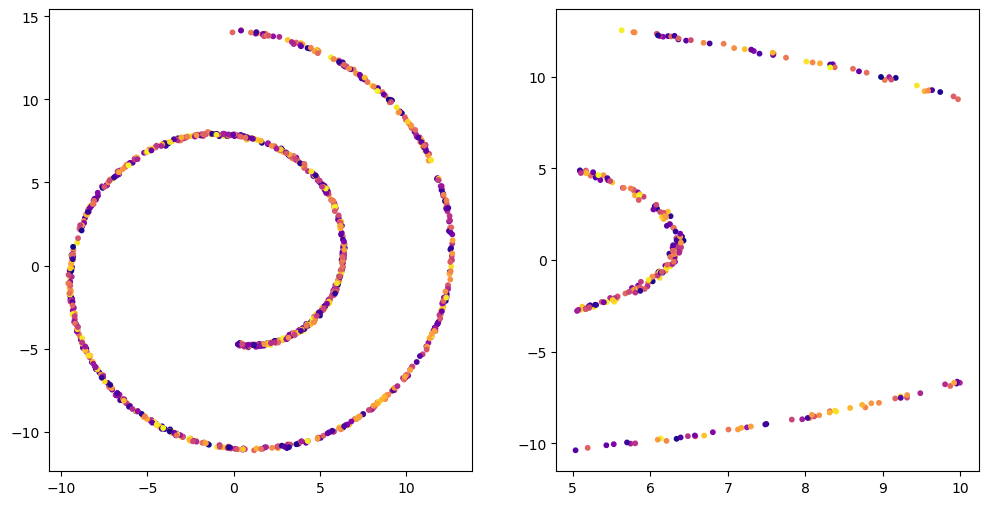

In [125]:
# data visualization using the original and filtered data
df_original, df_filtered = load_and_process_swiss_roll()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

scatter1 = ax[0].scatter(df_original['X'], df_original['Z'], c=df_original['Y'], cmap='plasma', s=10)

scatter2 = ax[1].scatter(df_filtered['X'], df_filtered['Z'], c=df_filtered['Y'], cmap='plasma', s=10)